# Parte 1 HOUSING


In [22]:
#librerías
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Carga de datos
df = pd.read_csv('data/housing.csv')

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
# Convertir variables categóricas en valores numéricos
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [26]:
# Codificar la columna 'furnishingstatus' con valores numéricos
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [27]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['price'])
y = df['price']

In [28]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Transformar datos para que sean compatibles con CNN (agregar dimensión de canal)
X_scaled = np.expand_dims(X_scaled, axis=2)

In [30]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
# Definir el modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Salida para regresión
])

/Users/santiagoaguirre/Library/CloudStorage/OneDrive-ITESO/semestre 7/no lineales pronosticos/tarea-4-ejercicio-cnn-tarea-4-9/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [33]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24484260085760.0000 - mae: 4643245.0000 - val_loss: 30129524834304.0000 - val_mae: 5007491.5000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 23933231300608.0000 - mae: 4583678.0000 - val_loss: 30121991864320.0000 - val_mae: 5006771.5000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 25156051271680.0000 - mae: 4666736.0000 - val_loss: 30080753467392.0000 - val_mae: 5002837.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 25340959260672.0000 - mae: 4737508.5000 - val_loss: 29944975458304.0000 - val_mae: 4989907.5000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 24904399323136.0000 - mae: 4678510.5000 - val_loss: 29617700208640.0000 - val_mae: 4958686.5000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 24945918738432.0000 - mae: 4681455.5000 - val_loss: 28990582554624.0000 - val_mae: 4898244.5000
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 235654

In [34]:
# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3535273721856.0000 - mae: 1346394.7500
Mean Absolute Error: 1281227.625


In [35]:
# Realizar predicciones
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


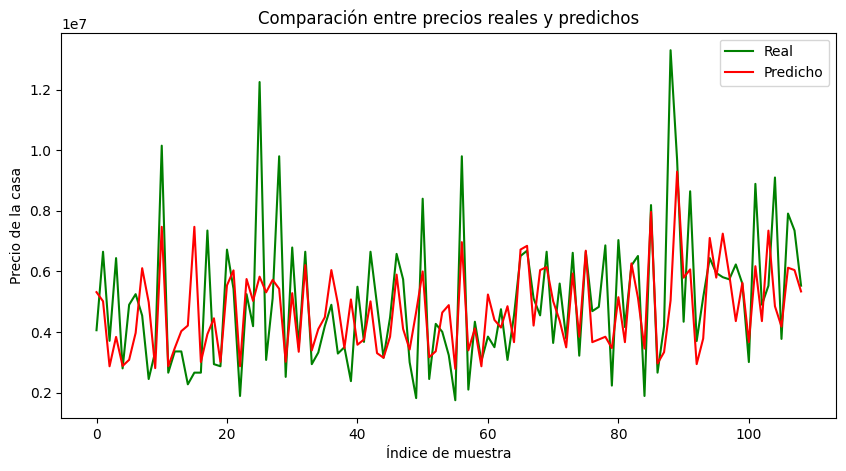

In [36]:
# Gráfico de comparación de valores reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Real", color="green")
plt.plot(predictions, label="Predicho", color="red")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio de la casa")
plt.title("Comparación entre precios reales y predichos")
plt.legend()
plt.show()

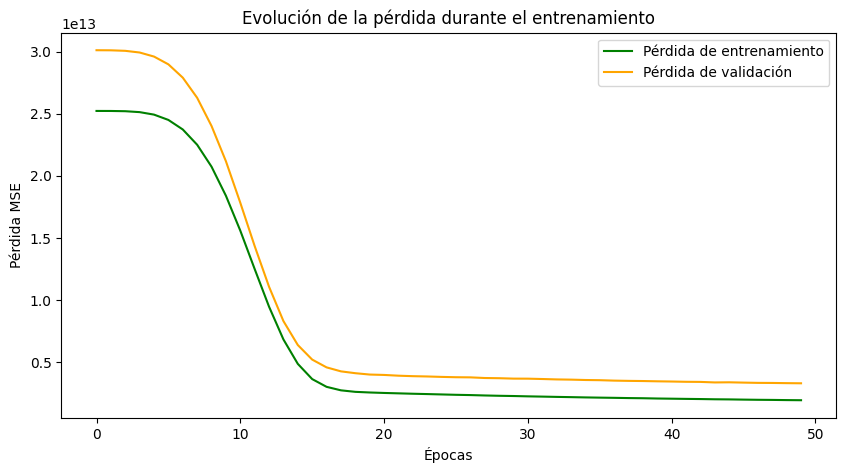

In [37]:

# Curva de error durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Pérdida de entrenamiento", color="green")
plt.plot(history.history["val_loss"], label="Pérdida de validación", color="orange")
plt.xlabel("Épocas")
plt.ylabel("Pérdida MSE")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.legend()
plt.show()

# Hallazgos

* El modelo es capaz de captar la tendencia general de los precios de las casas.
* Las predicciones siguen bastante bien la distribución real de los precios.
* El modelo está aprendiendo correctamente, ya que ambas pérdidas disminuyen con el entrenamiento.
* No hay señales fuertes de underfitting (falta de aprendizaje), lo que significa que la arquitectura de la CNN es lo suficientemente compleja para captar los patrones.

Posibles problemas o mejoras:

* El modelo subestima o sobreestima algunos valores atípicos. Puede que necesite más datos para aprender mejor estos casos extremos.

* Puede haber ruido en los datos, lo que hace que algunos valores reales varíen más de lo esperado.

* Ligeras señales de overfitting: La diferencia entre la pérdida de entrenamiento y validación al final del entrenamiento sugiere que el modelo está ajustándose demasiado a los datos de entrenamiento y no generaliza perfectamente en datos nuevos.
	-	Se podría mejorar la generalización con técnicas como:
	-	Dropout en las capas densas finales para reducir la dependencia de patrones específicos.
	-	Regularización L2 para evitar que los pesos de la red se vuelvan demasiado grandes.





# PARTE 2

In [38]:
# Cargar el dataset de consumo de demanda eléctrica en Australia
df = pd.read_csv("data/PRICE_AND_DEMAND_201801_NSW1.csv")


In [39]:
# Convertir la columna de fecha a formato datetime y ordenar por fecha
df["SETTLEMENTDATE"] = pd.to_datetime(df["SETTLEMENTDATE"])
df = df.sort_values(by="SETTLEMENTDATE")

In [40]:
# Seleccionar solo la columna de demanda total
demand_series = df["TOTALDEMAND"].values

In [41]:
# Normalizar los datos para que la CNN aprenda mejor
scaler = MinMaxScaler()
demand_series = scaler.fit_transform(demand_series.reshape(-1, 1))


In [42]:
# Función de la clase para dividir la serie en secuencias
def split_univariate_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x, seq_y = sequence[i:i + n_steps], sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [43]:
# Definir el número de pasos de tiempo (ventana de observación)
n_steps = 10  # Se puede ajustar


In [44]:
# Aplicar la función de división
X, y = split_univariate_sequence(demand_series, n_steps)


In [45]:
# Ajustar dimensiones para la CNN (agregar la dimensión de características)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [46]:
# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# 📌 **Modelo 1: CNN Simple**
model_1 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_1.compile(optimizer='adam', loss='mse')
print("📌 Modelo 1 (CNN Simple)")
model_1.summary()


📌 Modelo 1 (CNN Simple)


/Users/santiagoaguirre/Library/CloudStorage/OneDrive-ITESO/semestre 7/no lineales pronosticos/tarea-4-ejercicio-cnn-tarea-4-9/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 📌 **Modelo 2: CNN con más filtros y capas densas adicionales**
model_2 = Sequential([
    Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])
model_2.compile(optimizer='adam', loss='mse')
print("\n📌 Modelo 2 (CNN con más filtros y capas densas)")
model_2.summary()



📌 Modelo 2 (CNN con más filtros y capas densas)


/Users/santiagoaguirre/Library/CloudStorage/OneDrive-ITESO/semestre 7/no lineales pronosticos/tarea-4-ejercicio-cnn-tarea-4-9/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 9, 128)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,785 (221.82 KB)

 Trainable params: 56,785 (221.82 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# 📌 **Modelo 3: CNN con Dropout para evitar overfitting**
model_3 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.3),  # Regularización para evitar overfitting
    Dense(1)
])
model_3.compile(optimizer='adam', loss='mse')
print("\n📌 Modelo 3 (CNN con Dropout)")
model_3.summary()


📌 Modelo 3 (CNN con Dropout)


/Users/santiagoaguirre/Library/CloudStorage/OneDrive-ITESO/semestre 7/no lineales pronosticos/tarea-4-ejercicio-cnn-tarea-4-9/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Entrenar cada modelo
history_1 = model_1.fit(X_train, y_train, epochs=1000, verbose=False, validation_data=(X_test, y_test))
history_2 = model_2.fit(X_train, y_train, epochs=1000, verbose=False, validation_data=(X_test, y_test))
history_3 = model_3.fit(X_train, y_train, epochs=1000, verbose=False, validation_data=(X_test, y_test))


In [51]:
# Evaluar los modelos
loss_1 = model_1.evaluate(X_test, y_test)
loss_2 = model_2.evaluate(X_test, y_test)
loss_3 = model_3.evaluate(X_test, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7928e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6977e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2031e-04


In [52]:
print(f"\n Loss (MSE) en test - Modelo 1: {loss_1}")
print(f" Loss (MSE) en test - Modelo 2: {loss_2}")
print(f" Loss (MSE) en test - Modelo 3: {loss_3}")



 Loss (MSE) en test - Modelo 1: 0.00040966205415315926
 Loss (MSE) en test - Modelo 2: 0.0004966501146554947
 Loss (MSE) en test - Modelo 3: 0.0006248814752325416


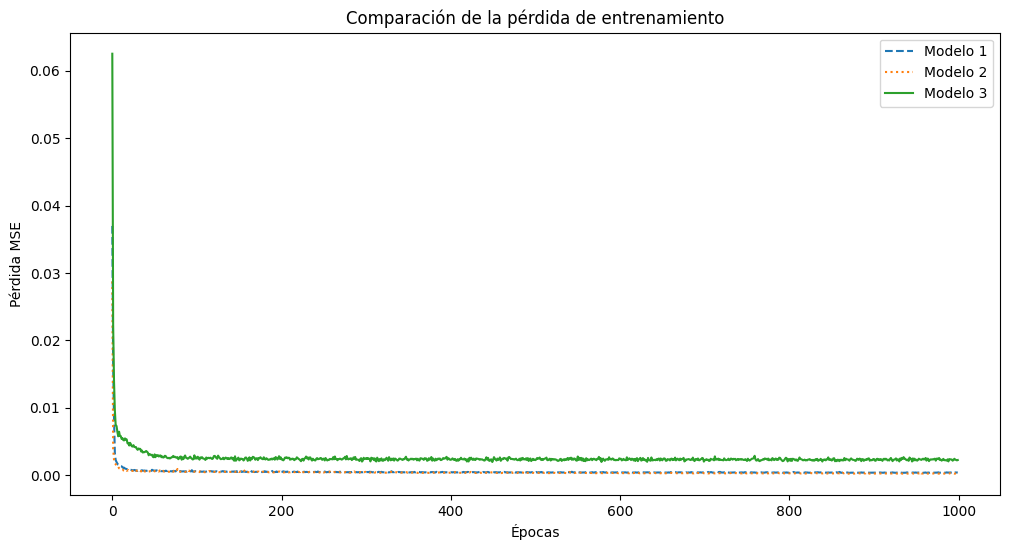

In [53]:
#  Gráfico de pérdida de entrenamiento para cada modelo
plt.figure(figsize=(12, 6))
plt.plot(history_1.history["loss"], label="Modelo 1", linestyle="dashed")
plt.plot(history_2.history["loss"], label="Modelo 2", linestyle="dotted")
plt.plot(history_3.history["loss"], label="Modelo 3", linestyle="solid")
plt.xlabel("Épocas")
plt.ylabel("Pérdida MSE")
plt.title("Comparación de la pérdida de entrenamiento")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


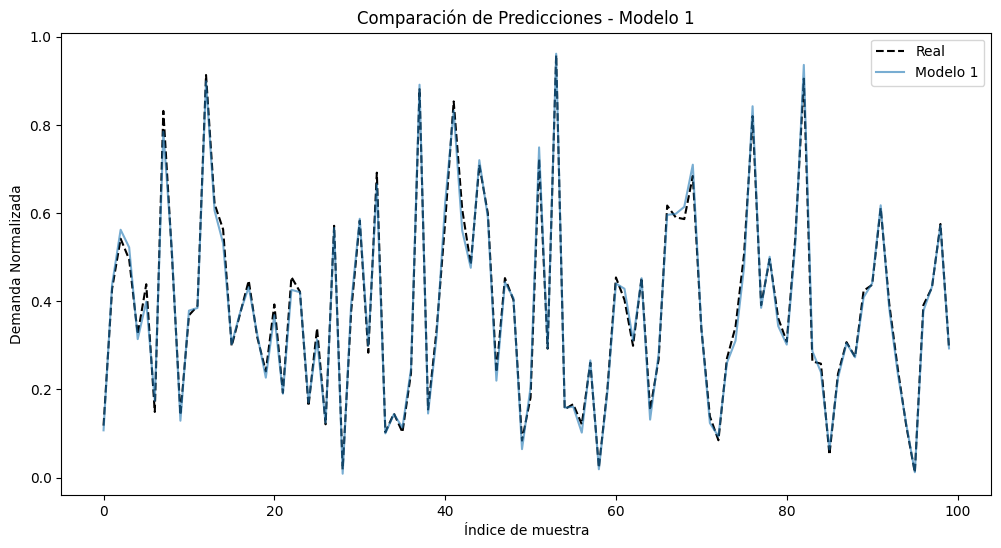

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


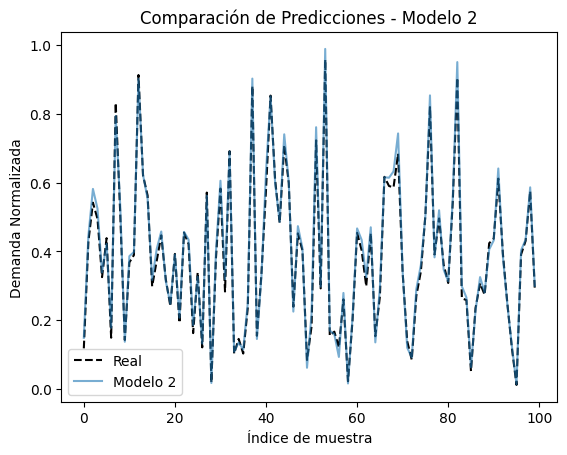

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


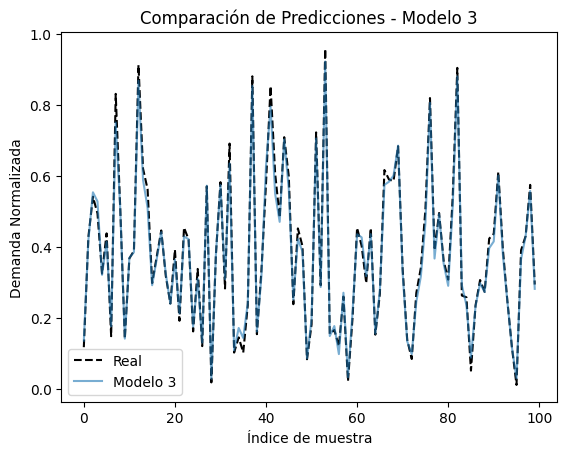

In [54]:
# 📊 Comparación de predicciones para cada modelo
models = [model_1, model_2, model_3]
model_names = ["Modelo 1", "Modelo 2", "Modelo 3"]

plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    plt.plot(y_test[:100], label="Real", color="black", linestyle="dashed")
    plt.plot(y_pred[:100], label=model_names[i], alpha=0.6)
    plt.title(f"Comparación de Predicciones - {model_names[i]}")
    plt.xlabel("Índice de muestra")
    plt.ylabel("Demanda Normalizada")
    plt.legend()
    plt.show()

In [55]:
# Desnormalizar las predicciones para ver valores originales
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original_1 = scaler.inverse_transform(model_1.predict(X_test))
y_pred_original_2 = scaler.inverse_transform(model_2.predict(X_test))
y_pred_original_3 = scaler.inverse_transform(model_3.predict(X_test))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


In [56]:
# Mostrar los primeros valores reales vs predichos
results_df = pd.DataFrame({
    "Real": y_test_original.flatten(),
    "Predicho_Modelo1": y_pred_original_1.flatten(),
    "Predicho_Modelo2": y_pred_original_2.flatten(),
    "Predicho_Modelo3": y_pred_original_3.flatten()
})

print("\n🔍 Comparación de Predicciones - Primeras 10 Muestras:")
print(results_df.head(10))


🔍 Comparación de Predicciones - Primeras 10 Muestras:
       Real  Predicho_Modelo1  Predicho_Modelo2  Predicho_Modelo3
0   6686.76       6616.834473       6888.385742       6807.665527
1   8730.45       8793.231445       8839.460938       8669.856445
2   9478.62       9612.225586       9741.619141       9560.796875
3   9168.98       9349.094727       9364.638672       9392.216797
4   8051.76       7978.913086       8142.458496       8029.604492
5   8798.58       8539.215820       8688.219727       8643.028320
6   6891.32       7060.403320       7082.766602       7075.183594
7  11387.35      11075.120117      11138.612305      10855.599609
8   9254.81       9308.185547       9406.386719       9246.421875
9   6847.25       6760.037109       6813.484863       6845.432617
